# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import nltk
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation


In [2]:
# Add any additional import statements you need here
import string
from nltk.corpus import stopwords
from itertools import chain
import re
import matplotlib.pyplot as plt
nltk.download('stopwords')
sw = stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/datascience/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    #num_tokens = 0
    #num_unique_tokens = 0
    #lexical_diversity = 0.0
    #num_characters = 0
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are useful in code because they check that the program is running correctly, detect errors early on, make the code more clear and self-explanatory, and provide helpful messages for debugging.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data
lyrics_data = pd.DataFrame(columns=['artist','filename','lyrics'])

for root, dirs, files in os.walk("/Users/datascience/Desktop/Text Mining/ads-tm-api-scrape/lyrics"):
    for file in files:
        if file.endswith(".txt"):
            with open(os.path.join(root, file), "r") as f:
                # split the file path to get the artist and song name
                artist,filename = os.path.join(root,file).split("/")[-2:]
                # store the file contents in the dataframe
                lyrics_data = pd.concat([lyrics_data,pd.DataFrame({'artist':artist, 'filename':filename, 'lyrics':f.read()},index=[0])],ignore_index=True)

lyrics_data['song'] = lyrics_data['lyrics'].str.extract('^"(.*?)"', expand=False)
lyrics_data['lyrics'] = lyrics_data['lyrics'].str.replace('^".*?"\n', '')
lyrics_data = lyrics_data[['artist', 'filename', 'song', 'lyrics']]


/var/folders/5b/b9cxhv4n4t90drzfsj1kdbx00000gp/T/ipykernel_19914/2619833783.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics_data['lyrics'] = lyrics_data['lyrics'].str.replace('^".*?"\n', '')


In [7]:
lyrics_data

,artist,filename,song,lyrics
0,robyn,robyn_includemeout.txt,Include Me Out,\n\n\nIt is really very simple\nJust a single ...
1,robyn,robyn_electric.txt,Electric,\n\n\nElectric...\n\nIt's electric\nIt's a nat...
2,robyn,robyn_beach2k20.txt,Beach 2K20,\n\n\n(So you wanna go out?\nHow you gonna get...
3,robyn,robyn_lovekills.txt,Love Kills,\n\n\nIf you're looking for love\nGet a heart ...
4,robyn,robyn_timemachine.txt,Time Machine,"\n\n\nHey, what did I do?\nCan't believe the f..."
...,...,...,...,...
415,cher,cher_takeitfromtheboys.txt,Take It From The Boys,\n\n\nSo scared I never been\nToo hard to keep...
416,cher,cher_dreambaby.txt,Dream Baby,\n\n\nI found the boy for me\nHe's my dream ba...
417,cher,cher_pleasedonttellme.txt,Please Don't Tell Me,\n\n\nYa shook the override \nWhy'd I get this...
418,cher,cher_ihopeyoufindit.txt,I Hope You Find It,"\n\n\nThese clouds aren't going nowhere, darli..."


In [8]:
# Read in the twitter data
twitter_data = []

for root, dirs, files in os.walk("/Users/datascience/Desktop/Text Mining/ads-tm-api-scrape/twitter"):
    for file in files:
        if file.endswith(".txt"):
            with open(os.path.join(root, file), "r") as f:
                artist = file.split("_")[0]
                for line in f:
                    data = line.strip().split("\t")
                    if len(data)>6:
                      twitter_data.append({'artist':artist, 'screen_name':data[0], 'description':data[6]})

twitter_data = pd.DataFrame(twitter_data)

twitter_data['artist'] = twitter_data['artist'].replace('robynkonichiwa', 'robyn', regex=True)

In [9]:
twitter_data

,artist,screen_name,description
0,cher,screen_name,description
1,cher,horrormomy,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,anju79990584,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher,gallionjenna,csu
4,cher,bcscomm,Writer @Washinformer @SpelmanCollege alumna #D...
...,...,...,...
2191120,robyn,jakegiles,"singer of songs, type 1 diabetic, tired $jakel..."
2191121,robyn,axelbluhme,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...
2191122,robyn,RayRayRay27,A year to change a life is still a year ✨😌
2191123,robyn,bhandberg,Head of Consumer - Mango. Made in Melbourne. R...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [10]:
punctuation = set(punctuation) # speeds up comparison

In [11]:
# Define a function to clean and tokenize the lyrics data
def clean_tokenize(words):
    # Remove punctuation characters
    cleaned = words.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    cleaned = cleaned.lower()
    # Tokenize the text
    tokenized = cleaned.split()
    # Remove stopwords
    tokenized = [word for word in tokenized if word not in sw]
    return tokenized

In [12]:
twitter_data['description_tokenized'] = twitter_data['description'].apply(clean_tokenize)

In [13]:
twitter_data

,artist,screen_name,description,description_tokenized
0,cher,screen_name,description,[description]
1,cher,horrormomy,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]"
2,cher,anju79990584,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]"
3,cher,gallionjenna,csu,[csu]
4,cher,bcscomm,Writer @Washinformer @SpelmanCollege alumna #D...,"[writer, washinformer, spelmancollege, alumna,..."
...,...,...,...,...
2191120,robyn,jakegiles,"singer of songs, type 1 diabetic, tired $jakel...","[singer, songs, type, 1, diabetic, tired, jake..."
2191121,robyn,axelbluhme,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,"[dadx2, conarch, photographer, dk, stemgrønnes..."
2191122,robyn,RayRayRay27,A year to change a life is still a year ✨😌,"[year, change, life, still, year, ✨😌]"
2191123,robyn,bhandberg,Head of Consumer - Mango. Made in Melbourne. R...,"[head, consumer, mango, made, melbourne, rambl..."


In [14]:
lyrics_data['lyrics_tokenized'] = lyrics_data['lyrics'].apply(clean_tokenize)

In [15]:
lyrics_data

,artist,filename,song,lyrics,lyrics_tokenized
0,robyn,robyn_includemeout.txt,Include Me Out,\n\n\nIt is really very simple\nJust a single ...,"[really, simple, single, pulse, repeated, regu..."
1,robyn,robyn_electric.txt,Electric,\n\n\nElectric...\n\nIt's electric\nIt's a nat...,"[electric, electric, natural, high, electric, ..."
2,robyn,robyn_beach2k20.txt,Beach 2K20,\n\n\n(So you wanna go out?\nHow you gonna get...,"[wanna, go, gonna, get, ok, call, someone, alr..."
3,robyn,robyn_lovekills.txt,Love Kills,\n\n\nIf you're looking for love\nGet a heart ...,"[youre, looking, love, get, heart, made, steel..."
4,robyn,robyn_timemachine.txt,Time Machine,"\n\n\nHey, what did I do?\nCan't believe the f...","[hey, cant, believe, fit, threw, stupid, wante..."
...,...,...,...,...,...
415,cher,cher_takeitfromtheboys.txt,Take It From The Boys,\n\n\nSo scared I never been\nToo hard to keep...,"[scared, never, hard, keep, good, girl, indepe..."
416,cher,cher_dreambaby.txt,Dream Baby,\n\n\nI found the boy for me\nHe's my dream ba...,"[found, boy, hes, dream, baby, doesnt, almost,..."
417,cher,cher_pleasedonttellme.txt,Please Don't Tell Me,\n\n\nYa shook the override \nWhy'd I get this...,"[ya, shook, override, whyd, get, far, time, to..."
418,cher,cher_ihopeyoufindit.txt,I Hope You Find It,"\n\n\nThese clouds aren't going nowhere, darli...","[clouds, arent, going, nowhere, darling, rain,..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [16]:
# Seperate the dataframe based on the artist
artist1_twitter = twitter_data.groupby('artist').get_group('robyn')
artist2_twitter = twitter_data.groupby('artist').get_group('cher')

artist1_lyrics = lyrics_data.groupby('artist').get_group('robyn')
artist2_lyrics = lyrics_data.groupby('artist').get_group('cher')

In [17]:
# calls to descriptive_stats here 

# Twitter Descriptive Stats
print('Twitter Artist 1: robyn\n')
flattened_tokens_artist1_twitter = list(chain.from_iterable(artist1_twitter['description_tokenized']))
descriptive_stats(flattened_tokens_artist1_twitter, verbose=True)

print('\nTwitter Artist 2: cher\n')
flattened_tokens_artist2_twitter = list(chain.from_iterable(artist2_twitter['description_tokenized']))
descriptive_stats(flattened_tokens_artist2_twitter, verbose=True)


# Lyrics Descriptive Stats
print('\nLyrics Artist 1: robyn\n')
flattened_tokens_artist1_lyrics = list(chain.from_iterable(artist1_lyrics['lyrics_tokenized']))
descriptive_stats(flattened_tokens_artist1_lyrics, verbose=True)

print('\nLyrics Artist 2: cher\n')
flattened_tokens_artist2_lyrics = list(chain.from_iterable(artist2_lyrics['lyrics_tokenized']))
descriptive_stats(flattened_tokens_artist2_lyrics, verbose=True)

Twitter Artist 1: robyn

There are 1495527 tokens in the data.
There are 252736 unique tokens in the data.
There are 9127828 characters in the data.
The lexical diversity is 0.169 in the data.

Twitter Artist 2: cher

There are 15670505 tokens in the data.
There are 1517718 unique tokens in the data.
There are 92951729 characters in the data.
The lexical diversity is 0.097 in the data.

Lyrics Artist 1: robyn

There are 15041 tokens in the data.
There are 2139 unique tokens in the data.
There are 72804 characters in the data.
The lexical diversity is 0.142 in the data.

Lyrics Artist 2: cher

There are 35233 tokens in the data.
There are 3684 unique tokens in the data.
There are 169244 characters in the data.
The lexical diversity is 0.105 in the data.


[35233, 3684, 0.10456106491073709, 169244]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top 5 words would be filled with "stopwords' as those are usually the most common words in a large body of text. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A:  I expected that the lexical diversity of lyrics among artists would vary depending on their genre and target audience. However, as both Cher and Robyn are pop artists, I anticipate that their lexical diversity scores will be somewhat similar.Pop music is known for its repetitive and simple lyrics, which can lead to lower lexical diversity scores. While both artists are in the pop genre, Cher's style incorporates elements of country and is geared towards older audiences, whereas Robyn's style is more contemporary and aimed at a younger audience. Given this, it is not surprising that Cher may have a slightly lower lexical diversity score due to the simplicity and repetition present in country music. Overall, the similarities in the lexical diversity scores are to be expected as both artists are in the same genre, pop.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [18]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [19]:
get_emojis_1str = lambda word_list: Counter([match["emoji"] for word in word_list for match in emoji.emoji_list(word)])
twitter_data['emoji_info'] = twitter_data['description_tokenized'].apply(get_emojis_1str)
artist1_twitter_emoji = twitter_data.groupby('artist').get_group('robyn')
artist2_twitter_emoji = twitter_data.groupby('artist').get_group('cher')

In [20]:
twitter_data

,artist,screen_name,description,description_tokenized,emoji_info
0,cher,screen_name,description,[description],{}
1,cher,horrormomy,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",{}
2,cher,anju79990584,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]","{'💜': 1, '🍒': 1, '💓': 1, '🧡': 1}"
3,cher,gallionjenna,csu,[csu],{}
4,cher,bcscomm,Writer @Washinformer @SpelmanCollege alumna #D...,"[writer, washinformer, spelmancollege, alumna,...",{}
...,...,...,...,...,...
2191120,robyn,jakegiles,"singer of songs, type 1 diabetic, tired $jakel...","[singer, songs, type, 1, diabetic, tired, jake...",{}
2191121,robyn,axelbluhme,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,"[dadx2, conarch, photographer, dk, stemgrønnes...",{}
2191122,robyn,RayRayRay27,A year to change a life is still a year ✨😌,"[year, change, life, still, year, ✨😌]","{'✨': 1, '😌': 1}"
2191123,robyn,bhandberg,Head of Consumer - Mango. Made in Melbourne. R...,"[head, consumer, mango, made, melbourne, rambl...",{}


In [21]:
li = artist1_twitter_emoji['emoji_info']
count = Counter(emoji for string in li for emoji in string)
print('Top 10 Emojis in Twitter Description for Artist 1 (Robyn)')
count.most_common(10)

Top 10 Emojis in Twitter Description for Artist 1 (Robyn)


[('🏳️\u200d🌈', 3122),
 ('❤️', 2130),
 ('♥', 1553),
 ('✨', 1532),
 ('🌈', 1287),
 ('❤', 1112),
 ('💙', 686),
 ('💜', 630),
 ('🎶', 628),
 ('🇺🇸', 573)]

In [22]:
li2 = artist2_twitter_emoji['emoji_info']
count2 = Counter(emoji for string in li2 for emoji in string)
print('\nTop 10 Emojis in Twitter Description for Artist 2 (Cher)')
count2.most_common(10)


Top 10 Emojis in Twitter Description for Artist 2 (Cher)


[('❤️', 34692),
 ('🏳️\u200d🌈', 28666),
 ('❤', 21179),
 ('✨', 20553),
 ('💙', 16532),
 ('♥', 15242),
 ('🌈', 15056),
 ('💜', 12932),
 ('🇺🇸', 12130),
 ('🌊', 10493)]

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [23]:
# Your code here
twitter_data['description'] = twitter_data['description'].apply(str.lower)
twitter_data["hashtags"] = twitter_data["description"].str.findall(r"#(\w+)")
twitter_data["hashtags"] = twitter_data["hashtags"].apply(', '.join)
twitter_data["hashtags"].fillna("NaN", inplace=True)


artist1_hashtag = twitter_data.groupby('artist').get_group('robyn')
artist2_hashtag = twitter_data.groupby('artist').get_group('cher')


print('\nTop 10 Hashtags for Robyn\n')
top_10_hashtags_artist1 = artist1_hashtag['hashtags'].value_counts().head(10)
print(top_10_hashtags_artist1)


print('\nTop 10 Hashtags for Cher\n')
top_10_hashtags_artist2 = artist2_hashtag['hashtags'].value_counts().head(10)
print(top_10_hashtags_artist2)


Top 10 Hashtags for Robyn

                    176985
blacklivesmatter       313
1                      157
blm                    149
teamfollowback          69
freebritney             38
resist                  30
bitcoin                 24
actuallyautistic        23
believe                 22
Name: hashtags, dtype: int64

Top 10 Hashtags for Cher

                    1832127
blacklivesmatter       3189
resist                 2917
blm                    2188
1                      2091
resistance              757
theresistance           717
teamfollowback          599
freebritney             474
resister                359
Name: hashtags, dtype: int64


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [30]:
lyrics_data['song_words'] = lyrics_data['song'].str.split()

artist1_song = lyrics_data.groupby('artist').get_group('robyn')
artist2_song = lyrics_data.groupby('artist').get_group('cher')

artist1_song_words = [word for sublist in artist1_song['song_words'].tolist() for word in sublist]
artist2_song_words = [word for sublist in artist2_song['song_words'].tolist() for word in sublist]

print('\nTop 10 Most Common Words in Song Titles for Robyn with Stopwords\n')
top_10_song_artist1 = pd.Series(artist1_song_words).value_counts().head(10)
print(top_10_song_artist1)

print('\nTop 10 Most Common Words in Song Titles for Cher with Stopwords\n')
top_10_song_artist2 = pd.Series(artist2_song_words).value_counts().head(10)
print(top_10_song_artist2)


print('\n---------------------------------------------------------------')
print('---------------------------------------------------------------\n')

lyrics_data['song_words_stop'] = lyrics_data['song_words'].apply(lambda x: [word for word in x if word.lower() not in sw])

artist1_song = lyrics_data.groupby('artist').get_group('robyn')
artist2_song = lyrics_data.groupby('artist').get_group('cher')

artist1_song_words = [word for sublist in artist1_song['song_words_stop'] for word in sublist]
artist2_song_words = [word for sublist in artist2_song['song_words_stop'] for word in sublist]

print('\nTop 10 Most Common Words in Song Titles for Robyn without StopWords\n')
top_10_song_artist1 = pd.Series(artist1_song_words).value_counts().head(10)
print(top_10_song_artist1)

print('\nTop 10 Most Common Words in Song Titles for Cher without StopWords\n')
top_10_song_artist2 = pd.Series(artist2_song_words).value_counts().head(10)
print(top_10_song_artist2)



Top 10 Most Common Words in Song Titles for Robyn with Stopwords

Me        11
My         8
The        8
You        8
Love       6
To         6
Do         5
Should     4
With       4
Don't      4
dtype: int64

Top 10 Most Common Words in Song Titles for Cher with Stopwords

The     53
You     40
Love    38
I       32
To      28
Me      22
A       22
Of      21
In      13
And     13
dtype: int64

---------------------------------------------------------------
---------------------------------------------------------------


Top 10 Most Common Words in Song Titles for Robyn without StopWords

Love         6
U            4
Know         3
Hang         3
Tell         3
Girl         3
Thing        3
Dance        2
Dancing      2
(Acoustic    2
dtype: int64

Top 10 Most Common Words in Song Titles for Cher without StopWords

Love     38
Man      12
Song     11
One       7
Know      6
Go        6
Time      6
Come      6
Never     5
Take      5
dtype: int64


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.11;0.775x0.77)
Artist 2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

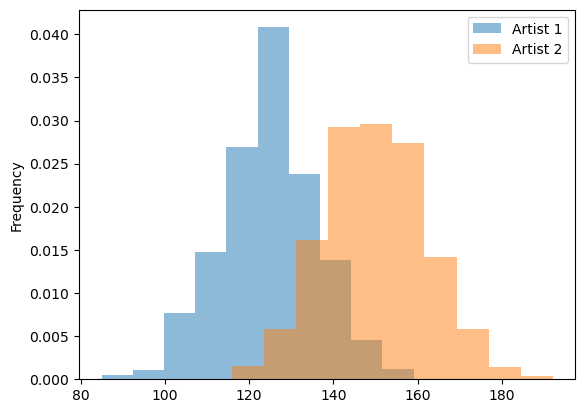

In [31]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

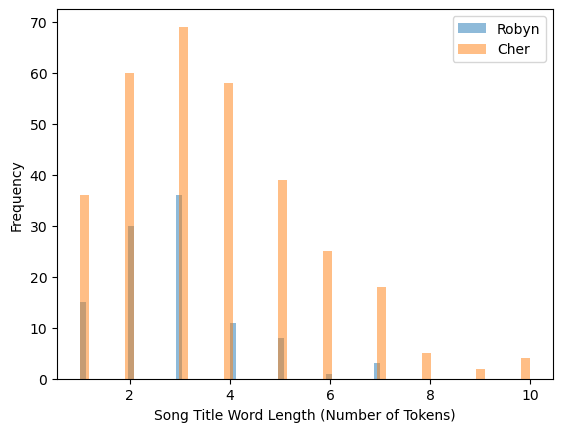

In [32]:

# Create a new column in the dataframe for song length
lyrics_data["song_length"] = lyrics_data["song_words"].apply(lambda x: len(x))

# Group the dataframe by artist
artist1_lyrics = lyrics_data.groupby('artist').get_group('robyn')
artist2_lyrics = lyrics_data.groupby('artist').get_group('cher')

# Plot the histograms for each artist
plt.hist(artist1_lyrics["song_length"], bins = 50, alpha = 0.5, label = "Robyn")
plt.hist(artist2_lyrics["song_length"], bins = 50, alpha = 0.5, label = "Cher")

# Add labels and legend to the plot
plt.xlabel("Song Title Word Length (Number of Tokens)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()


Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression '\s+' matches one or more whitespace characters. 


In [33]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

# The lyric data has already been tokenized earlier in the code

In [34]:
lyrics_data

,artist,filename,song,lyrics,lyrics_tokenized,song_words,song_words_stop,song_length
0,robyn,robyn_includemeout.txt,Include Me Out,\n\n\nIt is really very simple\nJust a single ...,"[really, simple, single, pulse, repeated, regu...","[Include, Me, Out]",[Include],3
1,robyn,robyn_electric.txt,Electric,\n\n\nElectric...\n\nIt's electric\nIt's a nat...,"[electric, electric, natural, high, electric, ...",[Electric],[Electric],1
2,robyn,robyn_beach2k20.txt,Beach 2K20,\n\n\n(So you wanna go out?\nHow you gonna get...,"[wanna, go, gonna, get, ok, call, someone, alr...","[Beach, 2K20]","[Beach, 2K20]",2
3,robyn,robyn_lovekills.txt,Love Kills,\n\n\nIf you're looking for love\nGet a heart ...,"[youre, looking, love, get, heart, made, steel...","[Love, Kills]","[Love, Kills]",2
4,robyn,robyn_timemachine.txt,Time Machine,"\n\n\nHey, what did I do?\nCan't believe the f...","[hey, cant, believe, fit, threw, stupid, wante...","[Time, Machine]","[Time, Machine]",2
...,...,...,...,...,...,...,...,...
415,cher,cher_takeitfromtheboys.txt,Take It From The Boys,\n\n\nSo scared I never been\nToo hard to keep...,"[scared, never, hard, keep, good, girl, indepe...","[Take, It, From, The, Boys]","[Take, Boys]",5
416,cher,cher_dreambaby.txt,Dream Baby,\n\n\nI found the boy for me\nHe's my dream ba...,"[found, boy, hes, dream, baby, doesnt, almost,...","[Dream, Baby]","[Dream, Baby]",2
417,cher,cher_pleasedonttellme.txt,Please Don't Tell Me,\n\n\nYa shook the override \nWhy'd I get this...,"[ya, shook, override, whyd, get, far, time, to...","[Please, Don't, Tell, Me]","[Please, Tell]",4
418,cher,cher_ihopeyoufindit.txt,I Hope You Find It,"\n\n\nThese clouds aren't going nowhere, darli...","[clouds, arent, going, nowhere, darling, rain,...","[I, Hope, You, Find, It]","[Hope, Find]",5


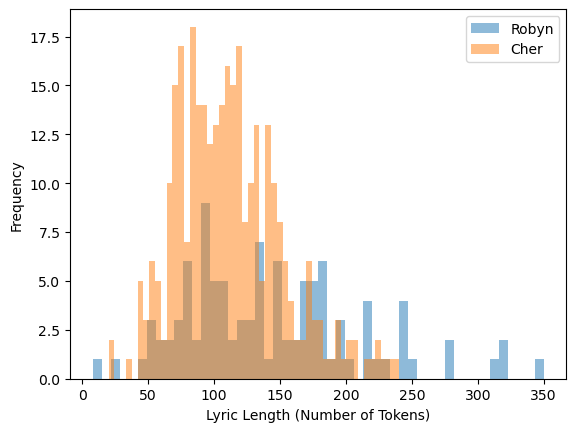

In [35]:
# Your lyric length comparison chart here. 

# Create a new column in the dataframe for song length
lyrics_data["lyric_length"] = lyrics_data["lyrics_tokenized"].apply(lambda x: len(x))

# Group the dataframe by artist
artist1_lyrics = lyrics_data.groupby('artist').get_group('robyn')
artist2_lyrics = lyrics_data.groupby('artist').get_group('cher')

# Plot the histograms for each artist
plt.hist(artist1_lyrics["lyric_length"], bins = 50, alpha = 0.5, label = "Robyn")
plt.hist(artist2_lyrics["lyric_length"], bins = 50, alpha = 0.5, label = "Cher")

# Add labels and legend to the plot
plt.xlabel("Lyric Length (Number of Tokens)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()